In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Summary

The below dataset pertains to restaurants that serves food. From the data below we will try to make a predicting modelling that will help us predict cost for food in a restaurant. We will be analysing the variables below to havce a better understanding of it.  

### Columnal Description

### Calling DataFrames

In [2]:
#calling training dataset
ds_res_train=pd.read_csv("Res_Train.csv",encoding="unicode_escape")
ds_res_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon  12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon  1am (Mon-Fri),11am  5pm, 7pm  1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon  12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am  10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
#calling testing dataset
ds_res_test=pd.read_csv("Res_Test.csv",encoding="unicode_escape")
ds_res_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon  12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am  12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am  11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am  10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am  10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am  11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am  1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am  10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


### Describing Info

In [4]:
#describing training info
ds_res_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
#describing testing info
ds_res_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


### Checking Missing Values

In [6]:
#checking missing info in the training dataset
ds_res_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [7]:
#checking missing info in the testing dataset
ds_res_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

### Replacing Null Values

In [8]:
#replacing null values in training dataset
for col in ["CITY","LOCALITY","RATING","VOTES"]:
    ds_res_train[col].fillna(ds_res_train[col].mode()[0],inplace=True)  

In [9]:
#replacing null values in testing dataset
for col in ["CITY","LOCALITY","RATING","VOTES"]:
    ds_res_test[col].fillna(ds_res_test[col].mode()[0],inplace=True)  

### Rechecking Missing Values 

In [10]:
#checking missing info in the training dataset
ds_res_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [11]:
#checking missing info in the testing dataset
ds_res_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

### Describing Statistics

In [12]:
#describing statistics for training dataset
ds_res_train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


### Describing Unique Categorical Values

In [13]:
#calling unique categorical values for training dataset
for column in ds_res_train.columns:
    if ds_res_train[column].dtype==object:
        print(str(column)+":"+str(ds_res_train[column].unique()))
        print(ds_res_train[column].value_counts())
        print("************************************************")
        print("\n")

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

In [14]:
#calling unique categorical values for testing dataset
for column in ds_res_test.columns:
    if ds_res_test[column].dtype==object:
        print(str(column)+":"+str(ds_res_test[column].unique()))
        print(ds_res_test[column].value_counts())
        print("************************************************")
        print("\n")

TITLE:['CASUAL DINING' 'QUICK BITES' 'None' 'FOOD TRUCK,DESSERT PARLOR'
 'DESSERT PARLOR,QUICK BITES' 'CASUAL DINING,BAR' 'LOUNGE' 'BEVERAGE SHOP'
 'CASUAL DINING,PUB' 'DESSERT PARLOR' 'PUB' 'CAFÉ' 'BAKERY' 'LOUNGE,BAR'
 'BAKERY,QUICK BITES' 'SWEET SHOP' 'SWEET SHOP,QUICK BITES'
 'BEVERAGE SHOP,QUICK BITES' 'CAFÉ,QUICK BITES' 'DHABA'
 'QUICK BITES,DESSERT PARLOR' 'FINE DINING' 'IRANI CAFE,BAKERY'
 'PUB,CASUAL DINING' 'BAKERY,CASUAL DINING' 'BAR' 'FOOD COURT'
 'QUICK BITES,SWEET SHOP' 'CAFÉ,BAR' 'BAR,PUB' 'BAKERY,DESSERT PARLOR'
 'KIOSK' 'CAFÉ,BAKERY' 'CASUAL DINING,BAKERY' 'BAKERY,CAFÉ'
 'CASUAL DINING,CAFÉ' 'QUICK BITES,CAFÉ' 'MESS' 'BAR,CASUAL DINING'
 'BEVERAGE SHOP,CAFÉ' 'BEVERAGE SHOP,DESSERT PARLOR' 'PUB,FINE DINING'
 'CASUAL DINING,FOOD COURT' 'CAFÉ,CASUAL DINING' 'LOUNGE,CASUAL DINING'
 'DESSERT PARLOR,CAFÉ' 'FINE DINING,BAR' 'CASUAL DINING,SWEET SHOP'
 'LOUNGE,FINE DINING' 'MICROBREWERY,PUB' 'FOOD TRUCK'
 'CASUAL DINING,MICROBREWERY' 'CLUB' 'CAFÉ,FOOD COURT'
 'CAFÉ,DESSERT PAR

In [15]:
#describing unique values in training dataset
for i in ds_res_train.columns:
    print("Unique values in", i, ds_res_train[i].nunique())

Unique values in TITLE 113
Unique values in RESTAURANT_ID 11892
Unique values in CUISINES 4155
Unique values in TIME 2689
Unique values in CITY 359
Unique values in LOCALITY 1416
Unique values in RATING 32
Unique values in VOTES 1847
Unique values in COST 86


In [16]:
#describing unique values in testing dataset
for i in ds_res_test.columns:
    print("Unique values in", i, ds_res_test[i].nunique())

Unique values in TITLE 86
Unique values in RESTAURANT_ID 4127
Unique values in CUISINES 1727
Unique values in TIME 1183
Unique values in CITY 151
Unique values in LOCALITY 834
Unique values in RATING 31
Unique values in VOTES 1136


### Combining Training and Testing Dataset

In [17]:
#combining the training and testing dataframes
ds_res_comb = [ds_res_train[['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']], ds_res_test]
ds_res_comb = pd.concat(ds_res_comb)
ds_res_comb

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am  11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am  1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am  10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,6 votes


### Analysing Columns

In [18]:
titles = list(ds_res_comb['TITLE'])
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Titles in a Cell : ", maxim)

#finding number of unique titles
all_titles = []
for i in titles :
    if len(i.split(',')) == 1:
         all_titles.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Titles : ", len(pd.Series(all_titles).unique()))
print("\n\nUnique Titles:\n", pd.Series(all_titles).unique())

all_titles = list(pd.Series(all_titles).unique())



Maximum Titles in a Cell :  2


Number of Unique Titles :  25


Unique Titles:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']


In [19]:
cuisines = list(ds_res_comb['CUISINES'])
maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)    

all_cuisines = []
for i in cuisines :
    if len(i.split(',')) == 1:
         #print(i.split(',')[0])
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            #print(i.split(',')[it])
            all_cuisines.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Cuisines : ", len(pd.Series(all_cuisines).unique()))
print("\n\nUnique Cuisines:\n", pd.Series(all_cuisines).unique())

all_cuisines = list(pd.Series(all_cuisines).unique())



Maximum cuisines in a Cell :  8


Number of Unique Cuisines :  130


Unique Cuisines:
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWICH'
 'MEDITERRANEAN' 'SALAD' 'GUJARATI' 'RAJASTHANI' 'TEX-MEX' 'ROAST CHICKEN'
 'BURMESE' 'CHETTINAD' 'NORTH EASTERN' 'LEBANESE' 'COFFEE AND TEA' 'GRILL'
 '' 'BIHARI' 'BENGALI' 'LUCKNOWI' 'AWADHI' 'STEAK' 'FRENCH' 'PORTUGUESE'
 'WRAPS' 'SRI LANKAN' 'ORIYA' 'ETHIOPIAN' 'KONKAN' 'SUSHI' 'SPANISH'
 'RUSSIAN' 'MANGALOREAN' 'TURKISH' 'BUBBLE TEA' 'AFGHAN' 'NAGA'
 '

In [20]:
all_cities = list(ds_res_comb['CITY'])
for i in range(len(all_cities)):
    if type(all_cities[i]) == float:
        all_cities[i] = 'NOT AVAILABLE'
    all_cities[i] = all_cities[i].strip().upper()
        
print("\n\nNumber of Unique cities (Including NOT AVAILABLE): ", len(pd.Series(all_cities).unique()))
print("\n\nUnique Cities:\n", pd.Series(all_cities).unique())
 
all_cities = list(pd.Series(all_cities).unique())



Number of Unique cities (Including NOT AVAILABLE):  444


Unique Cities:
 ['THANE' 'CHENNAI' 'MUMBAI' 'BANGALORE' 'GURGAON' 'HYDERABAD' 'KOCHI'
 'THANE WEST' 'ANDHERI LOKHANDWALA' 'NEW DELHI' 'ANDHERI WEST'
 'MALAD EAST' '682036' 'BANGALOR' 'NAVI MUMBAI' 'BANDRA WEST' 'DELHI'
 'NOIDA' 'BANGALORE-560066' 'SECUNDERABAD' 'INDIA' 'MADHURANAGAR'
 'CHENNAI TEYNAMPET' 'FARIDABAD' 'CHEMBUR.' 'MAHARASHTRA'
 'OPP GURUDWARA SHAKURPUR' 'TELAGANA LAND LINE:040-48507016' 'GHAZIABAD'
 'KARNATAKA' 'KERALA' 'EDAPPALLY' 'KADAVANTHRA' 'ERNAKULAM CIRCLE KOCHI'
 'BENGALORE' 'NEAR RELIANCE FRESH' 'KILPAUK' 'BENGALURU' 'KOTHAGUDA'
 'GOREGAON WEST' 'BANGLORE' 'TAMIL NADU' 'KAKKANAD' 'KOCHI ELAMKULAM'
 'OUTER RING ROAD' 'MULUND EAST'
 'SECUNDERABAD MAIN ROAD NEAR SIGNAL NMREC COLLEGE' 'TELANGANA'
 'PONNURUNI KOCHI' 'GACHIBOWLI' 'SEMMANCHERI'
 '5TH MAIN TEACHERS COLONY KORAMANGALA BLOCK 1 BANGALORE 560034'
 'MUMBAI MAHIM' 'POWAI (NEXT TO POWAI PLAZA)' 'DOMBIVALI EAST'
 'KOCHI VYTTILA' 'KANDIVALI' 'KOCHI PALAR

In [21]:
all_localities = list(ds_res_comb['LOCALITY'])

for i in range(len(all_localities)):
    if type(all_localities[i]) == float:
        all_localities[i] = 'NOT AVAILABLE'
    all_localities[i] = all_localities[i].strip().upper()
        
print("\n\nNumber of Unique Localities (Including NOT AVAILABLE) : ", len(pd.Series(all_localities).unique()))
print("\n\nUnique Localities:\n", pd.Series(all_localities).unique())

all_localities = list(pd.Series(all_localities).unique())



Number of Unique Localities (Including NOT AVAILABLE) :  1610


Unique Localities:
 ['DOMBIVALI EAST' 'RAMAPURAM' 'SALIGRAMAM' ... 'OFF CARTER ROAD'
 'SRM BACK GATE' 'PERRY CROSS ROAD']


### Cleaning Training Data

In [22]:
#cleaning column TITLE
titles = list(ds_res_train['TITLE'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

# appending NONE to Unique titles list
all_titles.append('NONE')

In [23]:
#Cleaning column CUISINES 
cuisines = list(ds_res_train['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []

for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

# appending NONE to Unique cuisines list
all_cuisines.append('NONE')

In [24]:
#cleaning Column CITY
cities = list(ds_res_train['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()

In [25]:
#cleaning column LOCALITY
localities = list(ds_res_train['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper()

In [26]:
#cleaning column RATING
rates = list(ds_res_train['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

In [27]:
#cleaning column VOTES
votes = list(ds_res_train['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass 

In [28]:
#framing new training dataframe

new_ds_res_train = {}

new_ds_res_train['TITLE1'] = T1
new_ds_res_train['TITLE2'] = T2
new_ds_res_train['RESTAURANT_ID'] = ds_res_train["RESTAURANT_ID"]
new_ds_res_train['CUISINE1'] = C1
new_ds_res_train['CUISINE2'] = C2
new_ds_res_train['CUISINE3'] = C3
new_ds_res_train['CUISINE4'] = C4
new_ds_res_train['CUISINE5'] = C5
new_ds_res_train['CUISINE6'] = C6
new_ds_res_train['CUISINE7'] = C7
new_ds_res_train['CUISINE8'] = C8
new_ds_res_train['CITY'] = cities
new_ds_res_train['LOCALITY'] = localities
new_ds_res_train['RATING'] = rates
new_ds_res_train['VOTES'] = votes
new_ds_res_train['COST'] = ds_res_train["COST"]

new_ds_res_train = pd.DataFrame(new_ds_res_train)
new_ds_res_train

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,NONE,9438,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,THANE,DOMBIVALI EAST,3.6,49,1200
1,CASUAL DINING,BAR,13198,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CHENNAI,RAMAPURAM,4.2,30,1500
2,CASUAL DINING,NONE,10915,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CHENNAI,SALIGRAMAM,3.8,221,800
3,QUICK BITES,NONE,6346,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA WEST,4.1,24,800
4,DESSERT PARLOR,NONE,15387,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,LOWER PAREL,3.8,165,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,NONE,13228,NORTH INDIAN,BURGER,KEBAB,NONE,NONE,NONE,NONE,NONE,HYDERABAD,GACHIBOWLI,3.8,546,500
12686,CASUAL DINING,BAR,9686,GOAN,CONTINENTAL,NONE,NONE,NONE,NONE,NONE,NONE,MUMBAI,BANDRA KURLA COMPLEX,4.3,1214,1800
12687,LOUNGE,NONE,11133,FINGER FOOD,CONTINENTAL,ASIAN,CHINESE,NONE,NONE,NONE,NONE,NAVI MUMBAI,VASHI,4.0,608,1300
12688,CASUAL DINING,NONE,6134,NORTH INDIAN,SOUTH INDIAN,CHINESE,STREET FOOD,NONE,NONE,NONE,NONE,CHENNAI,MADURAVOYAL,3.5,32,400


### Cleaning Testing Data

In [29]:
#cleaning column TITLE
titles = list(ds_res_test['TITLE'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

# appending NONE to Unique titles list
all_titles.append('NONE')

In [30]:
#Cleaning column CUISINES 
cuisines = list(ds_res_test['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []

for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

# appending NONE to Unique cuisines list
all_cuisines.append('NONE')

In [31]:
#cleaning Column CITY
cities = list(ds_res_test['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()

In [32]:
#cleaning column LOCALITY
localities = list(ds_res_test['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper()

In [33]:
#cleaning column RATING
rates = list(ds_res_test['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

In [34]:
#cleaning column VOTES
votes = list(ds_res_test['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass 

In [35]:
#framing new testing dataframe
new_ds_res_test = {}

new_ds_res_test['TITLE1'] = T1
new_ds_res_test['TITLE2'] = T2
new_ds_res_test['RESTAURANT_ID'] = ds_res_test["RESTAURANT_ID"]
new_ds_res_test['CUISINE1'] = C1
new_ds_res_test['CUISINE2'] = C2
new_ds_res_test['CUISINE3'] = C3
new_ds_res_test['CUISINE4'] = C4
new_ds_res_test['CUISINE5'] = C5
new_ds_res_test['CUISINE6'] = C6
new_ds_res_test['CUISINE7'] = C7
new_ds_res_test['CUISINE8'] = C8
new_ds_res_test['CITY'] = cities
new_ds_res_test['LOCALITY'] = localities
new_ds_res_test['RATING'] = rates
new_ds_res_test['VOTES'] = votes

new_ds_res_test = pd.DataFrame(new_ds_res_test)
new_ds_res_test

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,NONE,4085,NORTH INDIAN,CHINESE,MUGHLAI,KEBAB,NONE,NONE,NONE,NONE,NOIDA,SECTOR 18,4.3,564
1,QUICK BITES,NONE,12680,SOUTH INDIAN,FAST FOOD,PIZZA,NORTH INDIAN,NONE,NONE,NONE,NONE,MUMBAI,GRANT ROAD,4.2,61
2,CASUAL DINING,NONE,1411,NORTH INDIAN,SEAFOOD,BIRYANI,CHINESE,NONE,NONE,NONE,NONE,MUMBAI,MARINE LINES,3.8,350
3,NONE,NONE,204,BIRYANI,NONE,NONE,NONE,NONE,NONE,NONE,NONE,FARIDABAD,NIT,3.8,1445
4,QUICK BITES,NONE,13453,SOUTH INDIAN,KERALA,NONE,NONE,NONE,NONE,NONE,NONE,KOCHI,KALOOR,3.6,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,NONE,9057,NORTH INDIAN,MUGHLAI,CHINESE,NONE,NONE,NONE,NONE,NONE,NEW DELHI,PUNJABI BAGH,3.9,287
4227,NONE,NONE,1247,BIRYANI,NORTH INDIAN,SANDWICH,SALAD,WRAPS,NONE,NONE,NONE,BANGALORE,HSR LAYOUT,4.3,469
4228,QUICK BITES,NONE,8617,CONTINENTAL,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,NONE,FARIDABAD,SECTOR 86,3.7,53
4229,QUICK BITES,NONE,6485,ROLLS,BEVERAGES,NONE,NONE,NONE,NONE,NONE,NONE,KOCHI,KOCHI,NaN,6


### Univariate Analysis

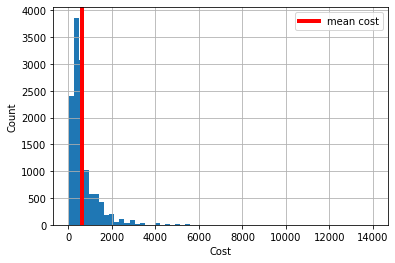

In [36]:
COST=new_ds_res_train["COST"].hist(bins=60)
mean_val=np.mean(new_ds_res_train["COST"])
plt.axvline(mean_val,linewidth=4,color="red",label="mean cost")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.legend()
plt.show()

### Describing Information

In [37]:
#describing information for new training dataset
new_ds_res_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE1         12690 non-null  object 
 1   TITLE2         12690 non-null  object 
 2   RESTAURANT_ID  12690 non-null  int64  
 3   CUISINE1       12690 non-null  object 
 4   CUISINE2       12690 non-null  object 
 5   CUISINE3       12690 non-null  object 
 6   CUISINE4       12690 non-null  object 
 7   CUISINE5       12690 non-null  object 
 8   CUISINE6       12690 non-null  object 
 9   CUISINE7       12690 non-null  object 
 10  CUISINE8       12690 non-null  object 
 11  CITY           12690 non-null  object 
 12  LOCALITY       12690 non-null  object 
 13  RATING         11488 non-null  float64
 14  VOTES          12690 non-null  int64  
 15  COST           12690 non-null  int64  
dtypes: float64(1), int64(3), object(12)
memory usage: 1.5+ MB


In [38]:
#describing information for new testing dataset
new_ds_res_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE1         4231 non-null   object 
 1   TITLE2         4231 non-null   object 
 2   RESTAURANT_ID  4231 non-null   int64  
 3   CUISINE1       4231 non-null   object 
 4   CUISINE2       4231 non-null   object 
 5   CUISINE3       4231 non-null   object 
 6   CUISINE4       4231 non-null   object 
 7   CUISINE5       4231 non-null   object 
 8   CUISINE6       4231 non-null   object 
 9   CUISINE7       4231 non-null   object 
 10  CUISINE8       4231 non-null   object 
 11  CITY           4231 non-null   object 
 12  LOCALITY       4231 non-null   object 
 13  RATING         3831 non-null   float64
 14  VOTES          4231 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 495.9+ KB


### Re-Checking for Missing Values

In [39]:
#checking for missing values in training dataset
new_ds_res_train.isnull().sum()

TITLE1              0
TITLE2              0
RESTAURANT_ID       0
CUISINE1            0
CUISINE2            0
CUISINE3            0
CUISINE4            0
CUISINE5            0
CUISINE6            0
CUISINE7            0
CUISINE8            0
CITY                0
LOCALITY            0
RATING           1202
VOTES               0
COST                0
dtype: int64

In [40]:
#checking for missing values in testing dataset
new_ds_res_test.isnull().sum()

TITLE1             0
TITLE2             0
RESTAURANT_ID      0
CUISINE1           0
CUISINE2           0
CUISINE3           0
CUISINE4           0
CUISINE5           0
CUISINE6           0
CUISINE7           0
CUISINE8           0
CITY               0
LOCALITY           0
RATING           400
VOTES              0
dtype: int64

### Replacing Missing Values

In [41]:
#replacing null values in training dataset
for col in ["RATING"]:
    new_ds_res_train[col].fillna(new_ds_res_train[col].mean(),inplace=True)  

In [42]:
#replacing null values in testing dataset
for col in ["RATING"]:
    new_ds_res_test[col].fillna(new_ds_res_test[col].mean(),inplace=True)  

In [43]:
#checking for missing values in training dataset
new_ds_res_train.isnull().sum()

TITLE1           0
TITLE2           0
RESTAURANT_ID    0
CUISINE1         0
CUISINE2         0
CUISINE3         0
CUISINE4         0
CUISINE5         0
CUISINE6         0
CUISINE7         0
CUISINE8         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [44]:
#checking for missing values in testing dataset
new_ds_res_test.isnull().sum()

TITLE1           0
TITLE2           0
RESTAURANT_ID    0
CUISINE1         0
CUISINE2         0
CUISINE3         0
CUISINE4         0
CUISINE5         0
CUISINE6         0
CUISINE7         0
CUISINE8         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

### Label Encoding

In [45]:
#using label encoder to quantify categorical data
from sklearn.preprocessing import LabelEncoder

le_titles = LabelEncoder()
le_cuisines = LabelEncoder()
le_city = LabelEncoder()
le_locality = LabelEncoder()
le_titles.fit(all_titles)
le_cuisines.fit(all_cuisines)
le_city.fit(all_cities)
le_locality.fit(all_localities)

#label encoding Training Set  

new_ds_res_train['TITLE1'] = le_titles.transform(new_ds_res_train['TITLE1'])
new_ds_res_train['TITLE2'] = le_titles.transform(new_ds_res_train['TITLE2'])

new_ds_res_train['CUISINE1'] = le_cuisines.transform(new_ds_res_train['CUISINE1'])
new_ds_res_train['CUISINE2'] = le_cuisines.transform(new_ds_res_train['CUISINE2'])
new_ds_res_train['CUISINE3'] = le_cuisines.transform(new_ds_res_train['CUISINE3'])
new_ds_res_train['CUISINE4'] = le_cuisines.transform(new_ds_res_train['CUISINE4'])
new_ds_res_train['CUISINE5'] = le_cuisines.transform(new_ds_res_train['CUISINE5'])
new_ds_res_train['CUISINE6'] = le_cuisines.transform(new_ds_res_train['CUISINE6'])
new_ds_res_train['CUISINE7'] = le_cuisines.transform(new_ds_res_train['CUISINE7'])
new_ds_res_train['CUISINE8'] = le_cuisines.transform(new_ds_res_train['CUISINE8'])

new_ds_res_train['CITY'] = le_city.transform(new_ds_res_train['CITY'])

new_ds_res_train['LOCALITY'] = le_locality.transform(new_ds_res_train['LOCALITY'])

#label encoding testing set  

new_ds_res_test['TITLE1'] = le_titles.transform(new_ds_res_test['TITLE1'])
new_ds_res_test['TITLE2'] = le_titles.transform(new_ds_res_test['TITLE2'])

new_ds_res_test['CUISINE1'] = le_cuisines.transform(new_ds_res_test['CUISINE1'])
new_ds_res_test['CUISINE2'] = le_cuisines.transform(new_ds_res_test['CUISINE2'])
new_ds_res_test['CUISINE3'] = le_cuisines.transform(new_ds_res_test['CUISINE3'])
new_ds_res_test['CUISINE4'] = le_cuisines.transform(new_ds_res_test['CUISINE4'])
new_ds_res_test['CUISINE5'] = le_cuisines.transform(new_ds_res_test['CUISINE5'])
new_ds_res_test['CUISINE6'] = le_cuisines.transform(new_ds_res_test['CUISINE6'])
new_ds_res_test['CUISINE7'] = le_cuisines.transform(new_ds_res_test['CUISINE7'])
new_ds_res_test['CUISINE8'] = le_cuisines.transform(new_ds_res_test['CUISINE8'])

new_ds_res_test['CITY'] = le_city.transform(new_ds_res_test['CITY'])

new_ds_res_test['LOCALITY'] = le_locality.transform(new_ds_res_test['LOCALITY'])

In [46]:
#calling training dataframe 
new_ds_res_train

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES,COST
0,5,20,9438,74,47,92,90,90,90,90,90,407,320,3.6,49,1200
1,5,1,13198,7,82,62,90,90,90,90,90,75,1203,4.2,30,1500
2,5,20,10915,92,29,17,55,90,90,90,90,75,1260,3.8,221,800
3,23,20,6346,126,29,90,90,90,90,90,90,280,149,4.1,24,800
4,9,20,15387,34,90,90,90,90,90,90,90,280,700,3.8,165,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,23,20,13228,92,22,66,90,90,90,90,90,163,383,3.8,546,500
12686,5,1,9686,47,32,90,90,90,90,90,90,280,146,4.3,1214,1800
12687,16,20,11133,42,32,7,29,90,90,90,90,302,1542,4.0,608,1300
12688,5,20,6134,92,116,29,120,90,90,90,90,75,706,3.5,32,400


In [47]:
#calling testing dataframe 
new_ds_res_test

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES
0,5,20,4085,92,29,86,66,90,90,90,90,326,1306,4.300000,564
1,23,20,12680,116,41,101,92,90,90,90,90,280,417,4.200000,61
2,5,20,1411,92,112,17,29,90,90,90,90,280,759,3.800000,350
3,20,20,204,17,90,90,90,90,90,90,90,131,1007,3.800000,1445
4,23,20,13453,116,67,90,90,90,90,90,90,220,557,3.600000,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,5,20,9057,92,86,29,90,90,90,90,90,319,1175,3.900000,287
4227,20,20,1247,17,92,110,109,130,90,90,90,37,469,4.300000,469
4228,23,20,8617,32,92,90,90,90,90,90,90,131,1363,3.700000,53
4229,23,20,6485,107,15,90,90,90,90,90,90,220,629,3.781545,6


### Plotting Distribution

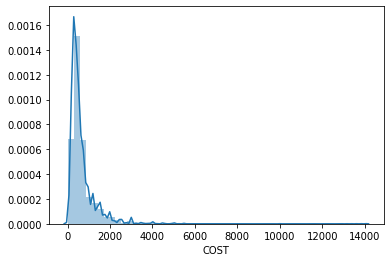

In [48]:
#plotting distribution of training dataset
sns.distplot(new_ds_res_train["COST"])

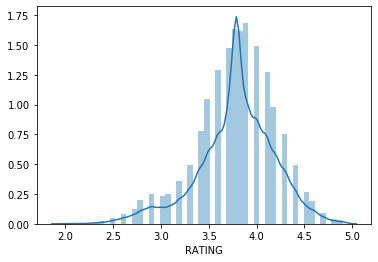

In [49]:
sns.distplot(new_ds_res_train["RATING"])

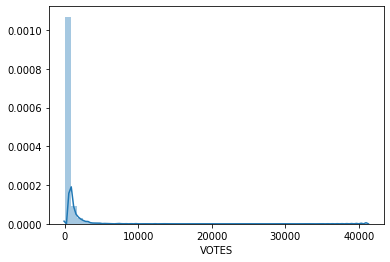

In [50]:
sns.distplot(new_ds_res_train["VOTES"])

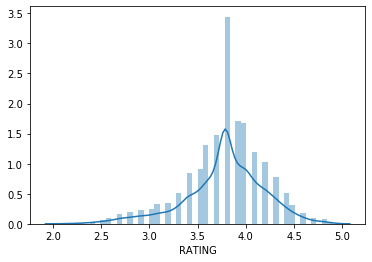

In [51]:
#plotting distribution of testing dataset
sns.distplot(new_ds_res_test["RATING"])

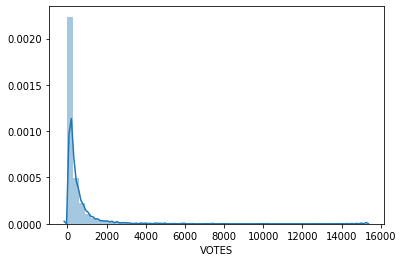

In [52]:
sns.distplot(new_ds_res_test["VOTES"])

### Plotting Outliers

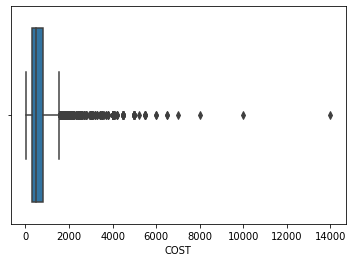

In [53]:
#plotting outliers for training dataset
sns.boxplot(new_ds_res_train["COST"])

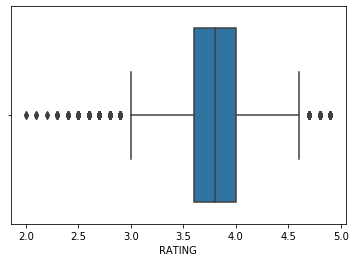

In [54]:
sns.boxplot(new_ds_res_train["RATING"])

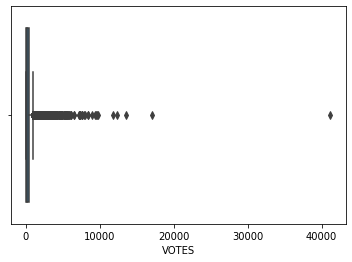

In [55]:
sns.boxplot(new_ds_res_train["VOTES"])

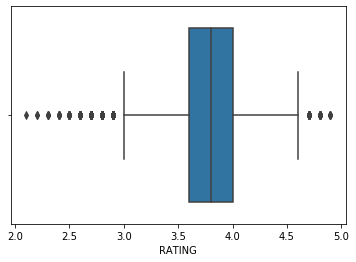

In [56]:
#plotting outliers for testing dataset
sns.boxplot(new_ds_res_test["RATING"])

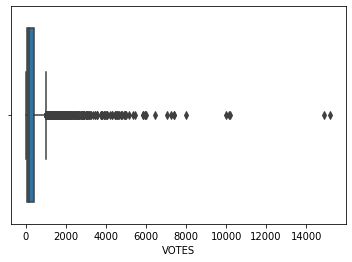

In [57]:
#plotting outliers for testing dataset
sns.boxplot(new_ds_res_test["VOTES"])

### Checking Skewness

In [58]:
#checking skewness for training data
new_ds_res_train.skew()

TITLE1            0.070889
TITLE2           -3.110608
RESTAURANT_ID     0.006947
CUISINE1          0.026907
CUISINE2         -0.159477
CUISINE3         -0.952408
CUISINE4         -2.210690
CUISINE5         -4.165283
CUISINE6         -7.158736
CUISINE7        -10.714668
CUISINE8        -13.850869
CITY              0.226523
LOCALITY          0.375959
RATING           -0.537487
VOTES            14.609221
COST              3.978801
dtype: float64

In [59]:
#checking skewness for testing data
new_ds_res_test.skew()

TITLE1            0.093155
TITLE2           -3.229260
RESTAURANT_ID     0.006586
CUISINE1         -0.016671
CUISINE2         -0.078671
CUISINE3         -0.979055
CUISINE4         -2.167568
CUISINE5         -4.127192
CUISINE6         -6.975550
CUISINE7         -9.387371
CUISINE8        -12.260657
CITY              0.190542
LOCALITY          0.401163
RATING           -0.598827
VOTES             7.054846
dtype: float64

###  Removing  Outliers

In [60]:
#using Zscore to remove the outliers from training dataset
from scipy.stats import zscore
z=np.abs(zscore(new_ds_res_train))
threshold=3
print(np.where(z>3))
ds_res_train_new=new_ds_res_train[(z<3).all(axis=1)]
print(new_ds_res_train.shape)
print(ds_res_train_new.shape)

(array([    1,     5,     6, ..., 12670, 12674, 12686], dtype=int64), array([1, 6, 7, ..., 8, 1, 1], dtype=int64))
(12690, 16)
(10776, 16)


In [61]:
#using Zscore to remove the outliers from testing dataset
from scipy.stats import zscore
z=np.abs(zscore(new_ds_res_test))
threshold=3
print(np.where(z>3))
ds_res_test_new=new_ds_res_test[(z<3).all(axis=1)]
print(new_ds_res_test.shape)
print(ds_res_test_new.shape)

(array([  12,   22,   22,   31,   39,   43,   48,   50,   54,   67,   68,
         78,   83,   85,   86,   92,   98,  101,  121,  129,  129,  134,
        152,  164,  165,  166,  166,  173,  173,  226,  227,  227,  231,
        240,  244,  249,  256,  260,  261,  261,  281,  282,  288,  301,
        301,  314,  319,  319,  322,  345,  348,  350,  353,  356,  366,
        368,  374,  377,  388,  393,  394,  396,  396,  396,  404,  414,
        415,  415,  426,  437,  444,  457,  457,  457,  457,  459,  475,
        479,  479,  490,  503,  505,  507,  516,  531,  531,  534,  534,
        538,  552,  553,  553,  553,  565,  565,  573,  592,  603,  612,
        629,  629,  630,  644,  648,  648,  648,  656,  669,  676,  683,
        688,  691,  713,  716,  719,  719,  719,  727,  730,  743,  744,
        759,  763,  777,  777,  796,  804,  806,  812,  812,  826,  831,
        875,  880,  880,  884,  884,  887,  888,  904,  905,  913,  916,
        924,  931,  932,  945,  959,  961,  966,  

### Fixing Skewness

In [62]:
#using log transformation technique to reduce data skewness on training dataset
for i in ds_res_train_new.columns:
    if ds_res_train_new[i].skew()>.55:
        ds_res_train_new[i]=np.log1p(ds_res_train_new[i])

In [63]:
#using log transformation technique to reduce data skewness on testing dataset
for i in ds_res_test_new.columns:
    if ds_res_test_new[i].skew()>.55:
        ds_res_test_new[i]=np.log1p(ds_res_test_new[i])

### Seperating Input and Target Variables

In [64]:
#splitting the data into target and input variable for the regression study  
train_x=new_ds_res_train.drop(columns="COST")
y=pd.DataFrame(new_ds_res_train["COST"])

In [65]:
#calling input variables
train_x

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES
0,5,20,9438,74,47,92,90,90,90,90,90,407,320,3.6,49
1,5,1,13198,7,82,62,90,90,90,90,90,75,1203,4.2,30
2,5,20,10915,92,29,17,55,90,90,90,90,75,1260,3.8,221
3,23,20,6346,126,29,90,90,90,90,90,90,280,149,4.1,24
4,9,20,15387,34,90,90,90,90,90,90,90,280,700,3.8,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,23,20,13228,92,22,66,90,90,90,90,90,163,383,3.8,546
12686,5,1,9686,47,32,90,90,90,90,90,90,280,146,4.3,1214
12687,16,20,11133,42,32,7,29,90,90,90,90,302,1542,4.0,608
12688,5,20,6134,92,116,29,120,90,90,90,90,75,706,3.5,32


In [66]:
#calling target variables
y

,COST
0,1200
1,1500
2,800
3,800
4,300
...,...
12685,500
12686,1800
12687,1300
12688,400


### Scaling Input Variables

In [67]:
#using standard scaler to scale input variables of the training dataset
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(train_x)
x=pd.DataFrame(x,columns=train_x.columns)
x

,TITLE1,TITLE2,RESTAURANT_ID,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,CITY,LOCALITY,RATING,VOTES
0,0.208333,0.833333,0.606049,0.565891,0.356589,0.705426,0.689922,0.689922,0.692308,0.697674,0.825688,0.920814,0.198383,0.551724,0.001093
1,0.208333,0.041667,0.847492,0.046512,0.627907,0.472868,0.689922,0.689922,0.692308,0.697674,0.825688,0.169683,0.747512,0.758621,0.000631
2,0.208333,0.833333,0.700893,0.705426,0.217054,0.124031,0.418605,0.689922,0.692308,0.697674,0.825688,0.169683,0.782960,0.620690,0.005269
3,0.958333,0.833333,0.407500,0.968992,0.217054,0.689922,0.689922,0.689922,0.692308,0.697674,0.825688,0.633484,0.092040,0.724138,0.000486
4,0.375000,0.833333,0.988056,0.255814,0.689922,0.689922,0.689922,0.689922,0.692308,0.697674,0.825688,0.633484,0.434701,0.620690,0.003909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0.958333,0.833333,0.849419,0.705426,0.162791,0.503876,0.689922,0.689922,0.692308,0.697674,0.825688,0.368778,0.237562,0.620690,0.013161
12686,0.208333,0.041667,0.621974,0.356589,0.240310,0.689922,0.689922,0.689922,0.692308,0.697674,0.825688,0.633484,0.090174,0.793103,0.029382
12687,0.666667,0.833333,0.714891,0.317829,0.240310,0.046512,0.217054,0.689922,0.692308,0.697674,0.825688,0.683258,0.958333,0.689655,0.014667
12688,0.208333,0.833333,0.393887,0.705426,0.891473,0.217054,0.922481,0.689922,0.692308,0.697674,0.825688,0.169683,0.438433,0.517241,0.000680


In [68]:
#using standard scaler to scale input variables of the testing dataset
mms=MinMaxScaler()
test=mms.fit_transform(new_ds_res_test)
test

array([[2.08333333e-01, 8.33333333e-01, 2.62187681e-01, ...,
        8.12189055e-01, 7.85714286e-01, 3.69030391e-02],
       [9.58333333e-01, 8.33333333e-01, 8.14246259e-01, ...,
        2.59328358e-01, 7.50000000e-01, 3.81528746e-03],
       [2.08333333e-01, 8.33333333e-01, 9.04361231e-02, ...,
        4.72014925e-01, 6.07142857e-01, 2.28259440e-02],
       ...,
       [9.58333333e-01, 8.33333333e-01, 5.53278952e-01, ...,
        8.47636816e-01, 5.71428571e-01, 3.28904092e-03],
       [9.58333333e-01, 8.33333333e-01, 4.16340163e-01, ...,
        3.91169154e-01, 6.00551889e-01, 1.97342455e-04],
       [9.58333333e-01, 8.33333333e-01, 1.55308626e-01, ...,
        7.05845771e-01, 5.71428571e-01, 3.94684910e-03]])

### Seperating Training and Testing Data

In [69]:
#using train_test_split to seperate training and testing data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10152, 15)
(2538, 15)
(10152, 1)
(2538, 1)


### Importing Regression Algorithims and Metrices

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Assigning Aliases

In [71]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
SVR=SVR()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor()
ABR=AdaBoostRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()

### Appending Models

In [72]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('SVR',SVR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

### Machine Learning 

In [73]:
#using a for loop to find the best perfoming model
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    r2=r2_score(y_test,pred)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pred)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.21727608533829512
Mean_Squared_Error = 281702.23698702577
Mean_Absolute_Error = 310.9766390229899
Root_Mean_Squared_Error = 530.7562877508149
Cross_Val_Score =  0.2148789400804759


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.20663027623912866
Mean_Squared_Error = 285533.66232308204
Mean_Absolute_Error = 316.3921003510426
Root_Mean_Squared_Error = 534.3534994019241
Cross_Val_Score =  0.21130710170908729


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ran

### Framing Compare Tables

In [74]:
#structuring the compare DataFrame
result = pd.DataFrame({"Model":Model,"R2_score":R2_score,"Mean_Squared_Error":MSE,"Cross_Val_score":cvs,
                       "Root_Mean_Squared_Error":RMSE,"Mean_Absolute_Error":MAE})
result

,Model,R2_score,Mean_Squared_Error,Cross_Val_score,Root_Mean_Squared_Error,Mean_Absolute_Error
0,LinearRegression,0.217276,281702.236987,0.215,530.756288,310.976639
1,Lasso,0.206630,285533.662323,0.211,534.353499,316.392100
2,Ridge,0.215733,282257.690168,0.217,531.279296,312.371546
3,ElasticNet,0.053244,340737.240051,0.053,583.727025,373.103465
4,SVR,0.069186,334999.767697,0.070,578.791644,304.046514
5,DecisionTreeRegressor,0.362230,229533.400315,0.476,479.096442,254.973995
6,KNeighborsRegressor,0.375424,224784.654484,0.346,474.114601,270.273207
7,AdaBoostRegressor,-0.826971,657526.761100,-0.934,810.880238,683.868320
8,RandomForestRegressor,0.726982,98259.245211,0.714,313.463308,184.012738
9,GradientBoostingRegressor,0.713559,103090.108767,0.696,321.076484,194.041522


###  Saving Model

In [81]:
import joblib
joblib.dump(RFR,"Model_Restaurant_Cost_RFR.obj")

['Model_Restaurant_Cost_RFR.obj']

### Loading Model

In [82]:
Model_Restaurant_Cost=joblib.load("Model_Restaurant_Cost_RFR.obj")

### Using Model

In [83]:
Model_Restaurant_Cost.predict(test)

array([1158.5,  316.1,  777. , ...,  390.5,  275.5,  348.5])